# **Consort - Formation NLP**

## Analyse de sentiments


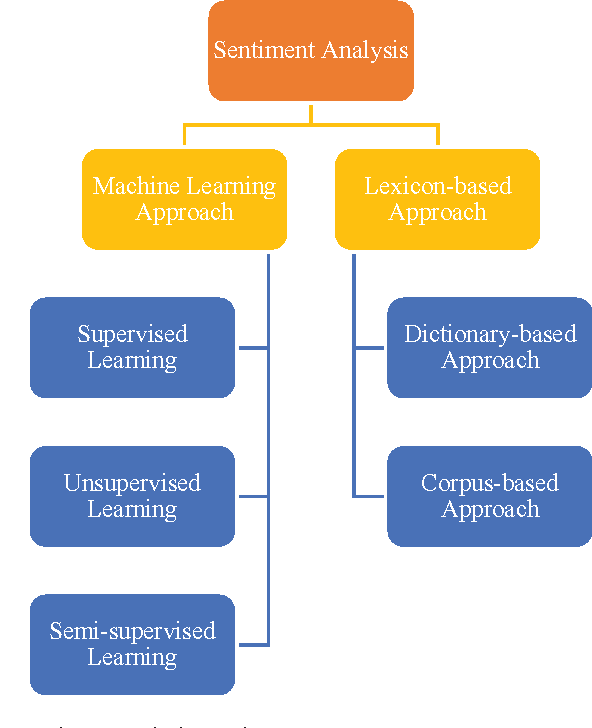







## Déterminer le sentiment d'un texte à l'aide de différentes techniques:

### Approche lexicale (Lexicon or Rule-Based approach)
  - RegEx
  - NLTK
  - SpaCy

### Machine Learning
  - Modèles à taille fixe
    - Bag of words
  - Modèles réccurents
    - CBOW
  - Modèles transformeurs
    - À affiner (fine-tune)
    - HuggingFace Sentiment Analysis
    - Google's API (sans création de compte)



# Données

Jeu de données pour l'analyse de sentiments: Avis des utilisateurs d'Allociné.fr.

Il contient 100 000 avis positifs et 100 000 avis négatifs répartis en 3 répartitions équilibrées : train (160 000 avis), val (20 000) et test (20 000).

Exemple:

In [1]:
import pickle
import tarfile

import pandas as pd

import config

# Load data
with tarfile.open(config.base_dir + '/Data/data.tar.bz2', 'r:bz2') as tar:
    datafile = tar.extractfile('data/allocine_dataset.pickle')
    all_data = pickle.load(datafile)

# For test data, we only keep the review and the polarity
test_data = all_data["test_set"].drop(columns=["film-url"])

# Print data example with complete content of  column 'review'
pd.set_option('display.max_colwidth', None)
all_data["test_set"].head()


,film-url,review,polarity
0,http://www.allocine.fr/film/fichefilm-25385/critiques/spectateurs,"Magnifique épopée, une belle histoire, touchante avec des acteurs qui interprètent très bien leur rôles (Mel Gibson, Heath Ledger, Jason Isaacs...), le genre de film qui se savoure en famille! :)",1
1,http://www.allocine.fr/film/fichefilm-1954/critiques/spectateurs,"Je n'ai pas aimé mais pourtant je lui mets 2 étoiles car l'expérience est louable. Rien de conventionnel ici. Une visite E.T. mais jonchée d'idées /- originales. Le soucis, tout ceci avait-il vraiment sa place dans un film de S.F. tirant sur l'horreur ? Voici un film qui, à l'inverse de tant d'autres qui y ont droit, mériterait peut-être un remake.",0
2,http://www.allocine.fr/film/fichefilm-135523/critiques/spectateurs,Un dessin animé qui brille par sa féerie et ses chansons.,1
3,http://www.allocine.fr/film/fichefilm-61514/critiques/spectateurs,"Si c'est là le renouveau du cinéma français, c'est tout de même foutrement chiant. Si l'objet est très stylisé et la tension palpable, le film paraît plutôt creux.",0
4,http://www.allocine.fr/film/fichefilm-260395/critiques/spectateurs,"Et pourtant on s’en Doutait !Second volet très mauvais, sans fraîcheur et particulièrement lourdingue. Quel dommage.",0


## Pré-traitement des données en NLP

Il existe plusieurs façons de pré-traiter des données textuelles afin d'en faciliter le traitement:
1. Retrait de caractères spéciaux
2. Tokenisation 
3. Mots vides (stop words)
4. POS (Étiquetage morpho-syntaxique ou Part-Of-Speech)
5. Radical (radicalisation et lemmatisation)

### Retrait de caractères spéciaux

In [2]:
import re

# Define a function to clean the text
def clean(text):
# Removes all special characters and numericals leaving the alphabets. Return in lower case
    clean_text = re.sub('[^A-Za-zÀ-Ÿ]+', ' ', text)
    return clean_text.lower()

# Cleaning the text in the review column
test_data['clean_review'] = test_data['review'].apply(clean)
test_data.head()



,review,polarity,clean_review
0,"Magnifique épopée, une belle histoire, touchante avec des acteurs qui interprètent très bien leur rôles (Mel Gibson, Heath Ledger, Jason Isaacs...), le genre de film qui se savoure en famille! :)",1,Magnifique épopée une belle histoire touchante avec des acteurs qui interprètent très bien leur rôles Mel Gibson Heath Ledger Jason Isaacs le genre de film qui se savoure en famille
1,"Je n'ai pas aimé mais pourtant je lui mets 2 étoiles car l'expérience est louable. Rien de conventionnel ici. Une visite E.T. mais jonchée d'idées /- originales. Le soucis, tout ceci avait-il vraiment sa place dans un film de S.F. tirant sur l'horreur ? Voici un film qui, à l'inverse de tant d'autres qui y ont droit, mériterait peut-être un remake.",0,Je n ai pas aimé mais pourtant je lui mets étoiles car l expérience est louable Rien de conventionnel ici Une visite E T mais jonchée d idées originales Le soucis tout ceci avait il vraiment sa place dans un film de S F tirant sur l horreur Voici un film qui à l inverse de tant d autres qui y ont droit mériterait peut être un remake
2,Un dessin animé qui brille par sa féerie et ses chansons.,1,Un dessin animé qui brille par sa féerie et ses chansons
3,"Si c'est là le renouveau du cinéma français, c'est tout de même foutrement chiant. Si l'objet est très stylisé et la tension palpable, le film paraît plutôt creux.",0,Si c est là le renouveau du cinéma français c est tout de même foutrement chiant Si l objet est très stylisé et la tension palpable le film paraît plutôt creux
4,"Et pourtant on s’en Doutait !Second volet très mauvais, sans fraîcheur et particulièrement lourdingue. Quel dommage.",0,Et pourtant on s en Doutait Second volet très mauvais sans fraîcheur et particulièrement lourdingue Quel dommage


### Tokenisation

Les phrases deviennent des liste de mots

In [3]:
import nltk
nltk.download('punkt')

from nltk.tokenize import word_tokenize

test_data['tokenized_NOT_CLEAN_review'] = test_data['review'].apply(lambda text: word_tokenize(text, language='french'))

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [4]:
test_data['token_review'] = test_data['clean_review'].apply(lambda text: word_tokenize(text, language='french'))
test_data.head()

,review,polarity,clean_review,tokenized_NOT_CLEAN_review,tokenized_review
0,"Magnifique épopée, une belle histoire, touchante avec des acteurs qui interprètent très bien leur rôles (Mel Gibson, Heath Ledger, Jason Isaacs...), le genre de film qui se savoure en famille! :)",1,Magnifique épopée une belle histoire touchante avec des acteurs qui interprètent très bien leur rôles Mel Gibson Heath Ledger Jason Isaacs le genre de film qui se savoure en famille,"[Magnifique, épopée, ,, une, belle, histoire, ,, touchante, avec, des, acteurs, qui, interprètent, très, bien, leur, rôles, (, Mel, Gibson, ,, Heath, Ledger, ,, Jason, Isaacs, ..., ), ,, le, genre, de, film, qui, se, savoure, en, famille, !, :, )]","[Magnifique, épopée, une, belle, histoire, touchante, avec, des, acteurs, qui, interprètent, très, bien, leur, rôles, Mel, Gibson, Heath, Ledger, Jason, Isaacs, le, genre, de, film, qui, se, savoure, en, famille]"
1,"Je n'ai pas aimé mais pourtant je lui mets 2 étoiles car l'expérience est louable. Rien de conventionnel ici. Une visite E.T. mais jonchée d'idées /- originales. Le soucis, tout ceci avait-il vraiment sa place dans un film de S.F. tirant sur l'horreur ? Voici un film qui, à l'inverse de tant d'autres qui y ont droit, mériterait peut-être un remake.",0,Je n ai pas aimé mais pourtant je lui mets étoiles car l expérience est louable Rien de conventionnel ici Une visite E T mais jonchée d idées originales Le soucis tout ceci avait il vraiment sa place dans un film de S F tirant sur l horreur Voici un film qui à l inverse de tant d autres qui y ont droit mériterait peut être un remake,"[Je, n'ai, pas, aimé, mais, pourtant, je, lui, mets, 2, étoiles, car, l'expérience, est, louable, ., Rien, de, conventionnel, ici, ., Une, visite, E.T, ., mais, jonchée, d'idées, /-, originales, ., Le, soucis, ,, tout, ceci, avait-il, vraiment, sa, place, dans, un, film, de, S.F, ., tirant, sur, l'horreur, ?, Voici, un, film, qui, ,, à, l'inverse, de, tant, d'autres, qui, y, ont, droit, ,, mériterait, peut-être, un, remake, .]","[Je, n, ai, pas, aimé, mais, pourtant, je, lui, mets, étoiles, car, l, expérience, est, louable, Rien, de, conventionnel, ici, Une, visite, E, T, mais, jonchée, d, idées, originales, Le, soucis, tout, ceci, avait, il, vraiment, sa, place, dans, un, film, de, S, F, tirant, sur, l, horreur, Voici, un, film, qui, à, l, inverse, de, tant, d, autres, qui, y, ont, droit, mériterait, peut, être, un, remake]"
2,Un dessin animé qui brille par sa féerie et ses chansons.,1,Un dessin animé qui brille par sa féerie et ses chansons,"[Un, dessin, animé, qui, brille, par, sa, féerie, et, ses, chansons, .]","[Un, dessin, animé, qui, brille, par, sa, féerie, et, ses, chansons]"
3,"Si c'est là le renouveau du cinéma français, c'est tout de même foutrement chiant. Si l'objet est très stylisé et la tension palpable, le film paraît plutôt creux.",0,Si c est là le renouveau du cinéma français c est tout de même foutrement chiant Si l objet est très stylisé et la tension palpable le film paraît plutôt creux,"[Si, c'est, là, le, renouveau, du, cinéma, français, ,, c'est, tout, de, même, foutrement, chiant, ., Si, l'objet, est, très, stylisé, et, la, tension, palpable, ,, le, film, paraît, plutôt, creux, .]","[Si, c, est, là, le, renouveau, du, cinéma, français, c, est, tout, de, même, foutrement, chiant, Si, l, objet, est, très, stylisé, et, la, tension, palpable, le, film, paraît, plutôt, creux]"
4,"Et pourtant on s’en Doutait !Second volet très mauvais, sans fraîcheur et particulièrement lourdingue. Quel dommage.",0,Et pourtant on s en Doutait Second volet très mauvais sans fraîcheur et particulièrement lourdingue Quel dommage,"[Et, pourtant, on, s, ’, en, Doutait, !, Second, volet, très, mauvais, ,, sans, fraîcheur, et, particulièrement, lourdingue, ., Quel, dommage, .]","[Et, pourtant, on, s, en, Doutait, Second, volet, très, mauvais, sans, fraîcheur, et, particulièrement, lourdingue, Quel, dommage]"


In [5]:
# Remove the reviews tokenized from non-cleaned reviews
test_data = test_data.drop(columns=['tokenized_NOT_CLEAN_review'])
test_data.head()

,review,polarity,clean_review,tokenized_review
0,"Magnifique épopée, une belle histoire, touchante avec des acteurs qui interprètent très bien leur rôles (Mel Gibson, Heath Ledger, Jason Isaacs...), le genre de film qui se savoure en famille! :)",1,Magnifique épopée une belle histoire touchante avec des acteurs qui interprètent très bien leur rôles Mel Gibson Heath Ledger Jason Isaacs le genre de film qui se savoure en famille,"[Magnifique, épopée, une, belle, histoire, touchante, avec, des, acteurs, qui, interprètent, très, bien, leur, rôles, Mel, Gibson, Heath, Ledger, Jason, Isaacs, le, genre, de, film, qui, se, savoure, en, famille]"
1,"Je n'ai pas aimé mais pourtant je lui mets 2 étoiles car l'expérience est louable. Rien de conventionnel ici. Une visite E.T. mais jonchée d'idées /- originales. Le soucis, tout ceci avait-il vraiment sa place dans un film de S.F. tirant sur l'horreur ? Voici un film qui, à l'inverse de tant d'autres qui y ont droit, mériterait peut-être un remake.",0,Je n ai pas aimé mais pourtant je lui mets étoiles car l expérience est louable Rien de conventionnel ici Une visite E T mais jonchée d idées originales Le soucis tout ceci avait il vraiment sa place dans un film de S F tirant sur l horreur Voici un film qui à l inverse de tant d autres qui y ont droit mériterait peut être un remake,"[Je, n, ai, pas, aimé, mais, pourtant, je, lui, mets, étoiles, car, l, expérience, est, louable, Rien, de, conventionnel, ici, Une, visite, E, T, mais, jonchée, d, idées, originales, Le, soucis, tout, ceci, avait, il, vraiment, sa, place, dans, un, film, de, S, F, tirant, sur, l, horreur, Voici, un, film, qui, à, l, inverse, de, tant, d, autres, qui, y, ont, droit, mériterait, peut, être, un, remake]"
2,Un dessin animé qui brille par sa féerie et ses chansons.,1,Un dessin animé qui brille par sa féerie et ses chansons,"[Un, dessin, animé, qui, brille, par, sa, féerie, et, ses, chansons]"
3,"Si c'est là le renouveau du cinéma français, c'est tout de même foutrement chiant. Si l'objet est très stylisé et la tension palpable, le film paraît plutôt creux.",0,Si c est là le renouveau du cinéma français c est tout de même foutrement chiant Si l objet est très stylisé et la tension palpable le film paraît plutôt creux,"[Si, c, est, là, le, renouveau, du, cinéma, français, c, est, tout, de, même, foutrement, chiant, Si, l, objet, est, très, stylisé, et, la, tension, palpable, le, film, paraît, plutôt, creux]"
4,"Et pourtant on s’en Doutait !Second volet très mauvais, sans fraîcheur et particulièrement lourdingue. Quel dommage.",0,Et pourtant on s en Doutait Second volet très mauvais sans fraîcheur et particulièrement lourdingue Quel dommage,"[Et, pourtant, on, s, en, Doutait, Second, volet, très, mauvais, sans, fraîcheur, et, particulièrement, lourdingue, Quel, dommage]"


### POS

In [6]:
# Need to download the french model first
!python -m spacy download fr_core_news_sm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.3/16.3 MB 4.3 MB/s eta 0:00:0000:0100:01
✔ Download and installation successful
You can now load the package via spacy.load('fr_core_news_sm')


In [9]:
import spacy

nlp = spacy.load('fr_core_news_sm')

doc = nlp(u'Demain, (je) travaille de très belle maison et tu es beau.')
for token in doc:
    print(token.text, token.pos_, token.lemma_)

Demain ADV demain
, PUNCT ,
( PUNCT (
je PRON je
) PUNCT )
travaille VERB travailler
de ADP de
très ADV très
belle ADJ bel
maison NOUN maison
et CCONJ et
tu VERB taire
es DET être
beau NOUN beau
. PUNCT .


In [21]:
import spacy
from spacy_lefff import LefffLemmatizer, POSTagger
from spacy.language import Language

nlp = spacy.load('fr_core_news_sm')

@Language.factory('french_lemmatizer')
def create_french_lemmatizer(nlp, name):
    return LefffLemmatizer(after_melt=True, default=True)

@Language.factory('melt_tagger')  
def create_melt_tagger(nlp, name):
    return POSTagger()
 

ValueError: [E004] Can't set up pipeline component: a factory for 'french_lemmatizer' already exists. Existing factory: <function create_french_lemmatizer at 0xffff1df5f910>. New factory: <function create_french_lemmatizer at 0xffff1db54e50>

In [22]:
nlp = spacy.load('fr_core_news_sm')
nlp.add_pipe('melt_tagger', after='parser')
nlp.add_pipe('french_lemmatizer', after='melt_tagger')
doc = nlp("Demain je travaille de très belle maison et tu es beau")
for d in doc:
    print(d.text, d.pos_, d._.melt_tagger, d._.lefff_lemma, d.tag_, d.lemma_)

Demain PROPN ADV demain PROPN Demain
je PRON CLS je PRON je
travaille VERB V travailler VERB travailler
de ADP P de ADP de
très ADV ADV très ADV très
belle ADJ ADJ beau ADJ bel
maison NOUN NC maison NOUN maison
et CCONJ CC et CCONJ et
tu VERB CLS tu VERB taire
es DET V être DET être
beau NOUN ADJ beau NOUN beau


In [20]:
doc = nlp("Demain je travaille de très belle maison et tu es beau")
for d in doc:
    print(d.text, d.pos_, d._.melt_tagger, d._.lefff_lemma, d.tag_, d.lemma_)

Demain PROPN ADV demain PROPN Demain
je PRON CLS je PRON je
travaille VERB V travailler VERB travailler
de ADP P de ADP de
très ADV ADV très ADV très
belle ADJ ADJ beau ADJ bel
maison NOUN NC maison NOUN maison
et CCONJ CC et CCONJ et
tu VERB CLS tu VERB taire
es DET V être DET être
beau NOUN ADJ beau NOUN beau


In [24]:
test_data['clean_review'][0:5].apply(lambda rvw: [d._.lefff_lemma for d in nlp(rvw)])

0                                                                                                                                                                                                           [magnifique, épopée, un, beau, histoire, touchant, avec, un, acteur, qui, interpréter, très, bien, son, rôle, mel, gibson, heath, ledger, jason, isaacs, le, genre, de, film, qui, clr, savourer, en, famille]
1    [je, n, avoir, pas, aimé, mais, pourtant, je, lui, mettre, étoile, car, l, expérience, être, louable, rien, de, conventionnel, ici, un, visite, e, t, mais, jonchée, d, idée, original, le, souci, tout, ceci, avoir, il, vraiment, son, place, dans, un, film, de, s, f, tirant, sur, l, horreur, voici, un, film, qui, à, l, inverse, de, tant, d, autre, qui, y, avoir, droit, mériter, pouvoir, être, un, remake]
2                                                                                                                                                                                 

In [25]:
test_data['lem_review'] = test_data['clean_review'].apply(lambda rvw: [d._.lefff_lemma for d in nlp(rvw)])
test_data.head()

,review,polarity,clean_review,tokenized_review,lem_review
0,"Magnifique épopée, une belle histoire, touchante avec des acteurs qui interprètent très bien leur rôles (Mel Gibson, Heath Ledger, Jason Isaacs...), le genre de film qui se savoure en famille! :)",1,Magnifique épopée une belle histoire touchante avec des acteurs qui interprètent très bien leur rôles Mel Gibson Heath Ledger Jason Isaacs le genre de film qui se savoure en famille,"[Magnifique, épopée, une, belle, histoire, touchante, avec, des, acteurs, qui, interprètent, très, bien, leur, rôles, Mel, Gibson, Heath, Ledger, Jason, Isaacs, le, genre, de, film, qui, se, savoure, en, famille]","[magnifique, épopée, un, beau, histoire, touchant, avec, un, acteur, qui, interpréter, très, bien, son, rôle, mel, gibson, heath, ledger, jason, isaacs, le, genre, de, film, qui, clr, savourer, en, famille]"
1,"Je n'ai pas aimé mais pourtant je lui mets 2 étoiles car l'expérience est louable. Rien de conventionnel ici. Une visite E.T. mais jonchée d'idées /- originales. Le soucis, tout ceci avait-il vraiment sa place dans un film de S.F. tirant sur l'horreur ? Voici un film qui, à l'inverse de tant d'autres qui y ont droit, mériterait peut-être un remake.",0,Je n ai pas aimé mais pourtant je lui mets étoiles car l expérience est louable Rien de conventionnel ici Une visite E T mais jonchée d idées originales Le soucis tout ceci avait il vraiment sa place dans un film de S F tirant sur l horreur Voici un film qui à l inverse de tant d autres qui y ont droit mériterait peut être un remake,"[Je, n, ai, pas, aimé, mais, pourtant, je, lui, mets, étoiles, car, l, expérience, est, louable, Rien, de, conventionnel, ici, Une, visite, E, T, mais, jonchée, d, idées, originales, Le, soucis, tout, ceci, avait, il, vraiment, sa, place, dans, un, film, de, S, F, tirant, sur, l, horreur, Voici, un, film, qui, à, l, inverse, de, tant, d, autres, qui, y, ont, droit, mériterait, peut, être, un, remake]","[je, n, avoir, pas, aimé, mais, pourtant, je, lui, mettre, étoile, car, l, expérience, être, louable, rien, de, conventionnel, ici, un, visite, e, t, mais, jonchée, d, idée, original, le, souci, tout, ceci, avoir, il, vraiment, son, place, dans, un, film, de, s, f, tirant, sur, l, horreur, voici, un, film, qui, à, l, inverse, de, tant, d, autre, qui, y, avoir, droit, mériter, pouvoir, être, un, remake]"
2,Un dessin animé qui brille par sa féerie et ses chansons.,1,Un dessin animé qui brille par sa féerie et ses chansons,"[Un, dessin, animé, qui, brille, par, sa, féerie, et, ses, chansons]","[un, dessin, animé, qui, briller, par, son, féerie, et, son, chanson]"
3,"Si c'est là le renouveau du cinéma français, c'est tout de même foutrement chiant. Si l'objet est très stylisé et la tension palpable, le film paraît plutôt creux.",0,Si c est là le renouveau du cinéma français c est tout de même foutrement chiant Si l objet est très stylisé et la tension palpable le film paraît plutôt creux,"[Si, c, est, là, le, renouveau, du, cinéma, français, c, est, tout, de, même, foutrement, chiant, Si, l, objet, est, très, stylisé, et, la, tension, palpable, le, film, paraît, plutôt, creux]","[si, c, être, là, le, renouveau, du, cinéma, français, c, être, tout, de, même, foutrement, chiant, si, l, objet, être, très, stylisé, et, le, tension, palpable, le, film, paraître, plutôt, creux]"
4,"Et pourtant on s’en Doutait !Second volet très mauvais, sans fraîcheur et particulièrement lourdingue. Quel dommage.",0,Et pourtant on s en Doutait Second volet très mauvais sans fraîcheur et particulièrement lourdingue Quel dommage,"[Et, pourtant, on, s, en, Doutait, Second, volet, très, mauvais, sans, fraîcheur, et, particulièrement, lourdingue, Quel, dommage]","[et, pourtant, on, s, en, doutait, second, volet, très, mauvais, sans, fraîcheur, et, particulièrement, lourdingue, quel, dommage]"


### Mots vides

In [30]:
nltk.download('stopwords')

stopwords = nltk.corpus.stopwords.words('french')
stopwords[:10]


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


['au', 'aux', 'avec', 'ce', 'ces', 'dans', 'de', 'des', 'du', 'elle']

In [31]:
stopwords

['au',
 'aux',
 'avec',
 'ce',
 'ces',
 'dans',
 'de',
 'des',
 'du',
 'elle',
 'en',
 'et',
 'eux',
 'il',
 'ils',
 'je',
 'la',
 'le',
 'les',
 'leur',
 'lui',
 'ma',
 'mais',
 'me',
 'même',
 'mes',
 'moi',
 'mon',
 'ne',
 'nos',
 'notre',
 'nous',
 'on',
 'ou',
 'par',
 'pas',
 'pour',
 'qu',
 'que',
 'qui',
 'sa',
 'se',
 'ses',
 'son',
 'sur',
 'ta',
 'te',
 'tes',
 'toi',
 'ton',
 'tu',
 'un',
 'une',
 'vos',
 'votre',
 'vous',
 'c',
 'd',
 'j',
 'l',
 'à',
 'm',
 'n',
 's',
 't',
 'y',
 'été',
 'étée',
 'étées',
 'étés',
 'étant',
 'étante',
 'étants',
 'étantes',
 'suis',
 'es',
 'est',
 'sommes',
 'êtes',
 'sont',
 'serai',
 'seras',
 'sera',
 'serons',
 'serez',
 'seront',
 'serais',
 'serait',
 'serions',
 'seriez',
 'seraient',
 'étais',
 'était',
 'étions',
 'étiez',
 'étaient',
 'fus',
 'fut',
 'fûmes',
 'fûtes',
 'furent',
 'sois',
 'soit',
 'soyons',
 'soyez',
 'soient',
 'fusse',
 'fusses',
 'fût',
 'fussions',
 'fussiez',
 'fussent',
 'ayant',
 'ayante',
 'ayantes',


In [13]:
test_data['nosw_review'] = test_data['token_review'].apply(lambda x: [word.lower() for word in x if word.lower() not in stopwords])
test_data.head()

,review,polarity,clean_review,tokenized_review,stemmed_reviews,nosw_review
0,"Magnifique épopée, une belle histoire, touchante avec des acteurs qui interprètent très bien leur rôles (Mel Gibson, Heath Ledger, Jason Isaacs...), le genre de film qui se savoure en famille! :)",1,Magnifique épopée une belle histoire touchante avec des acteurs qui interprètent très bien leur rôles Mel Gibson Heath Ledger Jason Isaacs le genre de film qui se savoure en famille,"[Magnifique, épopée, une, belle, histoire, touchante, avec, des, acteurs, qui, interprètent, très, bien, leur, rôles, Mel, Gibson, Heath, Ledger, Jason, Isaacs, le, genre, de, film, qui, se, savoure, en, famille]","[magnif, épop, une, bel, histoir, touch, avec, de, acteur, qui, interprètent, tres, bien, leur, rôl, mel, gibson, heath, ledg, jason, isaac, le, genr, de, film, qui, se, savour, en, famill]","[magnifique, épopée, belle, histoire, touchante, acteurs, interprètent, très, bien, rôles, mel, gibson, heath, ledger, jason, isaacs, genre, film, savoure, famille]"
1,"Je n'ai pas aimé mais pourtant je lui mets 2 étoiles car l'expérience est louable. Rien de conventionnel ici. Une visite E.T. mais jonchée d'idées /- originales. Le soucis, tout ceci avait-il vraiment sa place dans un film de S.F. tirant sur l'horreur ? Voici un film qui, à l'inverse de tant d'autres qui y ont droit, mériterait peut-être un remake.",0,Je n ai pas aimé mais pourtant je lui mets étoiles car l expérience est louable Rien de conventionnel ici Une visite E T mais jonchée d idées originales Le soucis tout ceci avait il vraiment sa place dans un film de S F tirant sur l horreur Voici un film qui à l inverse de tant d autres qui y ont droit mériterait peut être un remake,"[Je, n, ai, pas, aimé, mais, pourtant, je, lui, mets, étoiles, car, l, expérience, est, louable, Rien, de, conventionnel, ici, Une, visite, E, T, mais, jonchée, d, idées, originales, Le, soucis, tout, ceci, avait, il, vraiment, sa, place, dans, un, film, de, S, F, tirant, sur, l, horreur, Voici, un, film, qui, à, l, inverse, de, tant, d, autres, qui, y, ont, droit, mériterait, peut, être, un, remake]","[je, n, ai, pas, aim, mais, pourt, je, lui, met, étoil, car, l, expérient, est, louabl, rien, de, conventionnel, ici, une, visit, e, t, mais, jonch, d, idé, original, le, souc, tout, cec, avait, il, vrai, sa, plac, dan, un, film, de, s, f, tir, sur, l, horreur, voic, un, film, qui, à, l, invers, de, tant, d, autr, qui, y, ont, droit, mérit, peut, être, un, remak]","[aimé, pourtant, mets, étoiles, car, expérience, louable, rien, conventionnel, ici, visite, e, jonchée, idées, originales, soucis, tout, ceci, vraiment, place, film, f, tirant, horreur, voici, film, inverse, tant, autres, droit, mériterait, peut, être, remake]"
2,Un dessin animé qui brille par sa féerie et ses chansons.,1,Un dessin animé qui brille par sa féerie et ses chansons,"[Un, dessin, animé, qui, brille, par, sa, féerie, et, ses, chansons]","[un, dessin, anim, qui, brill, par, sa, féer, et, se, chanson]","[dessin, animé, brille, féerie, chansons]"
3,"Si c'est là le renouveau du cinéma français, c'est tout de même foutrement chiant. Si l'objet est très stylisé et la tension palpable, le film paraît plutôt creux.",0,Si c est là le renouveau du cinéma français c est tout de même foutrement chiant Si l objet est très stylisé et la tension palpable le film paraît plutôt creux,"[Si, c, est, là, le, renouveau, du, cinéma, français, c, est, tout, de, même, foutrement, chiant, Si, l, objet, est, très, stylisé, et, la, tension, palpable, le, film, paraît, plutôt, creux]","[si, c, est, là, le, renouveau, du, cinem, franc, c, est, tout, de, mêm, foutr, chi, si, l, objet, est, tres, stylis, et, la, tension, palpabl, le, film, paraît, plutôt, creux]","[si, là, renouveau, cinéma, français, tout, foutrement, chiant, si, objet, très, stylisé, tension, palpable, film, paraît, plutôt, creux]"
4,"Et pourtant on s’en Doutait !Second volet très mauvais, sans fraîcheur et particulièrement lo

In [27]:
doc = nlp("Et pourtant on s’en doutait !Second volet très mauvais, sans fraîcheur et particulièrement lourdingue. Quel dommage.")
for d in doc:
    print(d.text, d.pos_, d._.melt_tagger, d._.lefff_lemma, d.tag_, d.lemma_)

Et CCONJ CC et CCONJ et
pourtant ADV ADV pourtant ADV pourtant
on PRON CLS on PRON on
s’ VERB ET s’ VERB s’
en PRON CLO en PRON en
doutait VERB V douter VERB douter
! PUNCT PONCT ! PUNCT !
Second ADJ ADJ second ADJ second
volet NOUN NC volet NOUN volet
très ADV ADV très ADV très
mauvais ADJ ADJ mauvais ADJ mauvais
, PUNCT PONCT , PUNCT ,
sans ADP P sans ADP sans
fraîcheur NOUN NC fraîcheur NOUN fraîcheur
et CCONJ CC et CCONJ et
particulièrement ADV ADV particulièrement ADV particulièrement
lourdingue ADJ ADJ lourdingue ADJ lourdingue
. PUNCT PONCT . PUNCT .
Quel ADJ ADJWH quel ADJ quel
dommage NOUN NC dommage NOUN dommage
. PUNCT PONCT . PUNCT .


### Radicalisation 
#### Stemming

In [14]:
from nltk.stem.snowball import FrenchStemmer

stemmer = FrenchStemmer()
 
test_data['stem_review'] = test_data['token_review'].apply(lambda l: [stemmer.stem(word) for word in l])
test_data.head()

,review,polarity,clean_review,tokenized_review,stemmed_reviews,nosw_review
0,"Magnifique épopée, une belle histoire, touchante avec des acteurs qui interprètent très bien leur rôles (Mel Gibson, Heath Ledger, Jason Isaacs...), le genre de film qui se savoure en famille! :)",1,Magnifique épopée une belle histoire touchante avec des acteurs qui interprètent très bien leur rôles Mel Gibson Heath Ledger Jason Isaacs le genre de film qui se savoure en famille,"[Magnifique, épopée, une, belle, histoire, touchante, avec, des, acteurs, qui, interprètent, très, bien, leur, rôles, Mel, Gibson, Heath, Ledger, Jason, Isaacs, le, genre, de, film, qui, se, savoure, en, famille]","[magnif, épop, bel, histoir, touch, acteur, interprètent, tres, bien, rôl, mel, gibson, heath, ledg, jason, isaac, genr, film, savour, famill]","[magnifique, épopée, belle, histoire, touchante, acteurs, interprètent, très, bien, rôles, mel, gibson, heath, ledger, jason, isaacs, genre, film, savoure, famille]"
1,"Je n'ai pas aimé mais pourtant je lui mets 2 étoiles car l'expérience est louable. Rien de conventionnel ici. Une visite E.T. mais jonchée d'idées /- originales. Le soucis, tout ceci avait-il vraiment sa place dans un film de S.F. tirant sur l'horreur ? Voici un film qui, à l'inverse de tant d'autres qui y ont droit, mériterait peut-être un remake.",0,Je n ai pas aimé mais pourtant je lui mets étoiles car l expérience est louable Rien de conventionnel ici Une visite E T mais jonchée d idées originales Le soucis tout ceci avait il vraiment sa place dans un film de S F tirant sur l horreur Voici un film qui à l inverse de tant d autres qui y ont droit mériterait peut être un remake,"[Je, n, ai, pas, aimé, mais, pourtant, je, lui, mets, étoiles, car, l, expérience, est, louable, Rien, de, conventionnel, ici, Une, visite, E, T, mais, jonchée, d, idées, originales, Le, soucis, tout, ceci, avait, il, vraiment, sa, place, dans, un, film, de, S, F, tirant, sur, l, horreur, Voici, un, film, qui, à, l, inverse, de, tant, d, autres, qui, y, ont, droit, mériterait, peut, être, un, remake]","[aim, pourt, met, étoil, car, expérient, louabl, rien, conventionnel, ici, visit, e, jonch, idé, original, souc, tout, cec, vrai, plac, film, f, tir, horreur, voic, film, invers, tant, autr, droit, mérit, peut, être, remak]","[aimé, pourtant, mets, étoiles, car, expérience, louable, rien, conventionnel, ici, visite, e, jonchée, idées, originales, soucis, tout, ceci, vraiment, place, film, f, tirant, horreur, voici, film, inverse, tant, autres, droit, mériterait, peut, être, remake]"
2,Un dessin animé qui brille par sa féerie et ses chansons.,1,Un dessin animé qui brille par sa féerie et ses chansons,"[Un, dessin, animé, qui, brille, par, sa, féerie, et, ses, chansons]","[dessin, anim, brill, féer, chanson]","[dessin, animé, brille, féerie, chansons]"
3,"Si c'est là le renouveau du cinéma français, c'est tout de même foutrement chiant. Si l'objet est très stylisé et la tension palpable, le film paraît plutôt creux.",0,Si c est là le renouveau du cinéma français c est tout de même foutrement chiant Si l objet est très stylisé et la tension palpable le film paraît plutôt creux,"[Si, c, est, là, le, renouveau, du, cinéma, français, c, est, tout, de, même, foutrement, chiant, Si, l, objet, est, très, stylisé, et, la, tension, palpable, le, film, paraît, plutôt, creux]","[si, là, renouveau, cinem, franc, tout, foutr, chi, si, objet, tres, stylis, tension, palpabl, film, paraît, plutôt, creux]","[si, là, renouveau, cinéma, français, tout, foutrement, chiant, si, objet, très, stylisé, tension, palpable, film, paraît, plutôt, creux]"
4,"Et pourtant on s’en Doutait !Second volet très mauvais, sans fraîcheur et particulièrement lourdingue. Quel dommage.",0,Et pourtant on s en Doutait Second volet très mauvais sans fraîcheur et particulièrement lourdingue Quel dommage,"[Et, pourtant, on, s, en, Doutait, Second, volet, très, mauvais, sans, fraîcheur, et, particulièrement, lourdingue, Quel, domma

#### Lemmatisation

In [ ]:
import spacy
from spacy_lefff import LefffLemmatizer, POSTagger
from spacy.language import Language

nlp = spacy.load('fr_core_news_sm')

@Language.factory('french_lemmatizer')
def create_french_lemmatizer(nlp, name):
    return LefffLemmatizer(after_melt=True, default=True)

@Language.factory('melt_tagger')  
def create_melt_tagger(nlp, name):
    return POSTagger()

In [ ]:
test_data['lem_review'] = test_data['clean_review'].apply(lambda rvw: [d._.lefff_lemma for d in nlp(rvw)])
test_data.head()

In [ ]:
# Save

# A- Approche lexicale

1. Un "lexique" de mots avec le sentiment lié à ceux-ci est disponible
2. Pour le texte à analyser, extraction de mots présents dans le lexique
3. Calcul du sentiment général.

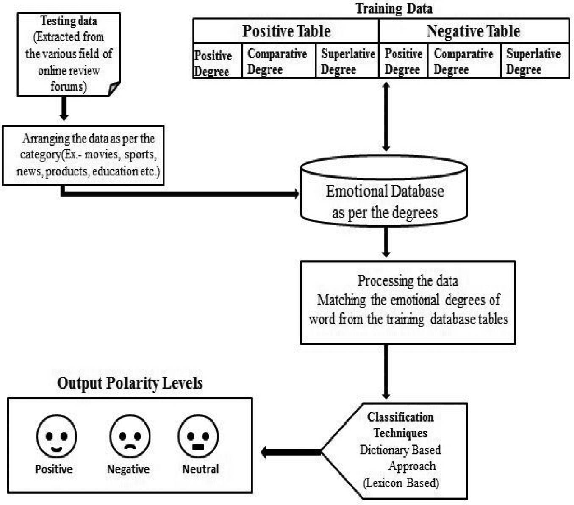


## Lexique

In [30]:
# Load lexicon txt file with pandas
lex_pos = pd.read_csv(config.base_dir + '/Data/positive_words_fr.txt', header=None)
lex_pos.columns = ['positive']
lex_neg = pd.read_csv(config.base_dir + '/Data/negative_words_fr.txt', header=None)
lex_neg.columns = ['negative']
# Create steemed versions of the lexicon
lex_pos['positive_stemmed'] = lex_pos['positive'].apply(lambda x: stemmer.stem(x))
lex_neg['negative_stemmed'] = lex_neg['negative'].apply(lambda x: stemmer.stem(x))

lex = pd.concat([lex_pos, lex_neg], axis=1)
lex.head(10)


,positive,positive_stemmed,negative,negative_stemmed
0,plus,plus,sur,sur
1,comme,comm,très,tres
2,premier,premi,tout,tout
3,bien,bien,contre,contr
4,groupe,group,faire,fair
5,sans,san,temps,temp
6,fin,fin,mort,mort
7,non,non,peu,peu
8,notamment,not,part,part
9,grand,grand,reste,rest


In [32]:
lex_pos = pd.read_csv(config.base_dir + '/Data/positive_words_fr.txt', header=None)
lex_pos.columns = ['positive']
lex_neg = pd.read_csv(config.base_dir + '/Data/negative_words_fr.txt', header=None)
lex_neg.columns = ['negative']

In [44]:
'très' in list(lex_neg)

False

In [56]:
'non' in lex_pos.values

True

## Predictions sans radicalisations

In [31]:
test_data['word_pos'] = test_data['nosw_review'].apply(lambda l: [w for w in l if w in lex['positive'].dropna().values])
test_data.head()

,review,polarity,clean_review,tokenized_review,stemmed_reviews,nosw_review,word_pos
0,"Magnifique épopée, une belle histoire, touchante avec des acteurs qui interprètent très bien leur rôles (Mel Gibson, Heath Ledger, Jason Isaacs...), le genre de film qui se savoure en famille! :)",1,Magnifique épopée une belle histoire touchante avec des acteurs qui interprètent très bien leur rôles Mel Gibson Heath Ledger Jason Isaacs le genre de film qui se savoure en famille,"[Magnifique, épopée, une, belle, histoire, touchante, avec, des, acteurs, qui, interprètent, très, bien, leur, rôles, Mel, Gibson, Heath, Ledger, Jason, Isaacs, le, genre, de, film, qui, se, savoure, en, famille]","[magnif, épop, bel, histoir, touch, acteur, interprètent, tres, bien, rôl, mel, gibson, heath, ledg, jason, isaac, genr, film, savour, famill]","[magnifique, épopée, belle, histoire, touchante, acteurs, interprètent, très, bien, rôles, mel, gibson, heath, ledger, jason, isaacs, genre, film, savoure, famille]","[magnifique, belle, bien, genre]"
1,"Je n'ai pas aimé mais pourtant je lui mets 2 étoiles car l'expérience est louable. Rien de conventionnel ici. Une visite E.T. mais jonchée d'idées /- originales. Le soucis, tout ceci avait-il vraiment sa place dans un film de S.F. tirant sur l'horreur ? Voici un film qui, à l'inverse de tant d'autres qui y ont droit, mériterait peut-être un remake.",0,Je n ai pas aimé mais pourtant je lui mets étoiles car l expérience est louable Rien de conventionnel ici Une visite E T mais jonchée d idées originales Le soucis tout ceci avait il vraiment sa place dans un film de S F tirant sur l horreur Voici un film qui à l inverse de tant d autres qui y ont droit mériterait peut être un remake,"[Je, n, ai, pas, aimé, mais, pourtant, je, lui, mets, étoiles, car, l, expérience, est, louable, Rien, de, conventionnel, ici, Une, visite, E, T, mais, jonchée, d, idées, originales, Le, soucis, tout, ceci, avait, il, vraiment, sa, place, dans, un, film, de, S, F, tirant, sur, l, horreur, Voici, un, film, qui, à, l, inverse, de, tant, d, autres, qui, y, ont, droit, mériterait, peut, être, un, remake]","[aim, pourt, met, étoil, car, expérient, louabl, rien, conventionnel, ici, visit, e, jonch, idé, original, souc, tout, cec, vrai, plac, film, f, tir, horreur, voic, film, invers, tant, autr, droit, mérit, peut, être, remak]","[aimé, pourtant, mets, étoiles, car, expérience, louable, rien, conventionnel, ici, visite, e, jonchée, idées, originales, soucis, tout, ceci, vraiment, place, film, f, tirant, horreur, voici, film, inverse, tant, autres, droit, mériterait, peut, être, remake]","[aimé, louable, droit]"
2,Un dessin animé qui brille par sa féerie et ses chansons.,1,Un dessin animé qui brille par sa féerie et ses chansons,"[Un, dessin, animé, qui, brille, par, sa, féerie, et, ses, chansons]","[dessin, anim, brill, féer, chanson]","[dessin, animé, brille, féerie, chansons]",[animé]
3,"Si c'est là le renouveau du cinéma français, c'est tout de même foutrement chiant. Si l'objet est très stylisé et la tension palpable, le film paraît plutôt creux.",0,Si c est là le renouveau du cinéma français c est tout de même foutrement chiant Si l objet est très stylisé et la tension palpable le film paraît plutôt creux,"[Si, c, est, là, le, renouveau, du, cinéma, français, c, est, tout, de, même, foutrement, chiant, Si, l, objet, est, très, stylisé, et, la, tension, palpable, le, film, paraît, plutôt, creux]","[si, là, renouveau, cinem, franc, tout, foutr, chi, si, objet, tres, stylis, tension, palpabl, film, paraît, plutôt, creux]","[si, là, renouveau, cinéma, français, tout, foutrement, chiant, si, objet, très, stylisé, tension, palpable, film, paraît, plutôt, creux]","[renouveau, stylisé]"
4,"Et pourtant on s’en Doutait !Second volet très mauvais, sans fraîcheur et particulièrement lourdingue. Quel dommage.",0,Et pourtant on s en Doutait Second volet très mauvais sans fraîcheur et particulièrement lourdingue Quel dommage,"[Et, pourtant, on, s, en, D

In [32]:
test_data['word_neg'] = test_data['nosw_review'].apply(lambda l: [w for w in l if w in lex['negative'].values])
test_data.head()

,review,polarity,clean_review,tokenized_review,stemmed_reviews,nosw_review,word_pos,word_neg
0,"Magnifique épopée, une belle histoire, touchante avec des acteurs qui interprètent très bien leur rôles (Mel Gibson, Heath Ledger, Jason Isaacs...), le genre de film qui se savoure en famille! :)",1,Magnifique épopée une belle histoire touchante avec des acteurs qui interprètent très bien leur rôles Mel Gibson Heath Ledger Jason Isaacs le genre de film qui se savoure en famille,"[Magnifique, épopée, une, belle, histoire, touchante, avec, des, acteurs, qui, interprètent, très, bien, leur, rôles, Mel, Gibson, Heath, Ledger, Jason, Isaacs, le, genre, de, film, qui, se, savoure, en, famille]","[magnif, épop, bel, histoir, touch, acteur, interprètent, tres, bien, rôl, mel, gibson, heath, ledg, jason, isaac, genr, film, savour, famill]","[magnifique, épopée, belle, histoire, touchante, acteurs, interprètent, très, bien, rôles, mel, gibson, heath, ledger, jason, isaacs, genre, film, savoure, famille]","[magnifique, belle, bien, genre]",[très]
1,"Je n'ai pas aimé mais pourtant je lui mets 2 étoiles car l'expérience est louable. Rien de conventionnel ici. Une visite E.T. mais jonchée d'idées /- originales. Le soucis, tout ceci avait-il vraiment sa place dans un film de S.F. tirant sur l'horreur ? Voici un film qui, à l'inverse de tant d'autres qui y ont droit, mériterait peut-être un remake.",0,Je n ai pas aimé mais pourtant je lui mets étoiles car l expérience est louable Rien de conventionnel ici Une visite E T mais jonchée d idées originales Le soucis tout ceci avait il vraiment sa place dans un film de S F tirant sur l horreur Voici un film qui à l inverse de tant d autres qui y ont droit mériterait peut être un remake,"[Je, n, ai, pas, aimé, mais, pourtant, je, lui, mets, étoiles, car, l, expérience, est, louable, Rien, de, conventionnel, ici, Une, visite, E, T, mais, jonchée, d, idées, originales, Le, soucis, tout, ceci, avait, il, vraiment, sa, place, dans, un, film, de, S, F, tirant, sur, l, horreur, Voici, un, film, qui, à, l, inverse, de, tant, d, autres, qui, y, ont, droit, mériterait, peut, être, un, remake]","[aim, pourt, met, étoil, car, expérient, louabl, rien, conventionnel, ici, visit, e, jonch, idé, original, souc, tout, cec, vrai, plac, film, f, tir, horreur, voic, film, invers, tant, autr, droit, mérit, peut, être, remak]","[aimé, pourtant, mets, étoiles, car, expérience, louable, rien, conventionnel, ici, visite, e, jonchée, idées, originales, soucis, tout, ceci, vraiment, place, film, f, tirant, horreur, voici, film, inverse, tant, autres, droit, mériterait, peut, être, remake]","[aimé, louable, droit]","[rien, soucis, tout, vraiment]"
2,Un dessin animé qui brille par sa féerie et ses chansons.,1,Un dessin animé qui brille par sa féerie et ses chansons,"[Un, dessin, animé, qui, brille, par, sa, féerie, et, ses, chansons]","[dessin, anim, brill, féer, chanson]","[dessin, animé, brille, féerie, chansons]",[animé],[]
3,"Si c'est là le renouveau du cinéma français, c'est tout de même foutrement chiant. Si l'objet est très stylisé et la tension palpable, le film paraît plutôt creux.",0,Si c est là le renouveau du cinéma français c est tout de même foutrement chiant Si l objet est très stylisé et la tension palpable le film paraît plutôt creux,"[Si, c, est, là, le, renouveau, du, cinéma, français, c, est, tout, de, même, foutrement, chiant, Si, l, objet, est, très, stylisé, et, la, tension, palpable, le, film, paraît, plutôt, creux]","[si, là, renouveau, cinem, franc, tout, foutr, chi, si, objet, tres, stylis, tension, palpabl, film, paraît, plutôt, creux]","[si, là, renouveau, cinéma, français, tout, foutrement, chiant, si, objet, très, stylisé, tension, palpable, film, paraît, plutôt, creux]","[renouveau, stylisé]","[tout, chiant, objet, très, tension, creux]"
4,"Et pourtant on s’en Doutait !Second volet très mauvais, sans fraîcheur et particulièrement lourdingue. Quel dommage.",0,Et pourtant on s en Doutait Second volet tr

In [33]:
test_data['diff_pos_neg'] = test_data['word_pos'].apply(len) - test_data['word_neg'].apply(len)
test_data.head()

,review,polarity,clean_review,tokenized_review,stemmed_reviews,nosw_review,word_pos,word_neg,diff_pos_neg
0,"Magnifique épopée, une belle histoire, touchante avec des acteurs qui interprètent très bien leur rôles (Mel Gibson, Heath Ledger, Jason Isaacs...), le genre de film qui se savoure en famille! :)",1,Magnifique épopée une belle histoire touchante avec des acteurs qui interprètent très bien leur rôles Mel Gibson Heath Ledger Jason Isaacs le genre de film qui se savoure en famille,"[Magnifique, épopée, une, belle, histoire, touchante, avec, des, acteurs, qui, interprètent, très, bien, leur, rôles, Mel, Gibson, Heath, Ledger, Jason, Isaacs, le, genre, de, film, qui, se, savoure, en, famille]","[magnif, épop, bel, histoir, touch, acteur, interprètent, tres, bien, rôl, mel, gibson, heath, ledg, jason, isaac, genr, film, savour, famill]","[magnifique, épopée, belle, histoire, touchante, acteurs, interprètent, très, bien, rôles, mel, gibson, heath, ledger, jason, isaacs, genre, film, savoure, famille]","[magnifique, belle, bien, genre]",[très],3
1,"Je n'ai pas aimé mais pourtant je lui mets 2 étoiles car l'expérience est louable. Rien de conventionnel ici. Une visite E.T. mais jonchée d'idées /- originales. Le soucis, tout ceci avait-il vraiment sa place dans un film de S.F. tirant sur l'horreur ? Voici un film qui, à l'inverse de tant d'autres qui y ont droit, mériterait peut-être un remake.",0,Je n ai pas aimé mais pourtant je lui mets étoiles car l expérience est louable Rien de conventionnel ici Une visite E T mais jonchée d idées originales Le soucis tout ceci avait il vraiment sa place dans un film de S F tirant sur l horreur Voici un film qui à l inverse de tant d autres qui y ont droit mériterait peut être un remake,"[Je, n, ai, pas, aimé, mais, pourtant, je, lui, mets, étoiles, car, l, expérience, est, louable, Rien, de, conventionnel, ici, Une, visite, E, T, mais, jonchée, d, idées, originales, Le, soucis, tout, ceci, avait, il, vraiment, sa, place, dans, un, film, de, S, F, tirant, sur, l, horreur, Voici, un, film, qui, à, l, inverse, de, tant, d, autres, qui, y, ont, droit, mériterait, peut, être, un, remake]","[aim, pourt, met, étoil, car, expérient, louabl, rien, conventionnel, ici, visit, e, jonch, idé, original, souc, tout, cec, vrai, plac, film, f, tir, horreur, voic, film, invers, tant, autr, droit, mérit, peut, être, remak]","[aimé, pourtant, mets, étoiles, car, expérience, louable, rien, conventionnel, ici, visite, e, jonchée, idées, originales, soucis, tout, ceci, vraiment, place, film, f, tirant, horreur, voici, film, inverse, tant, autres, droit, mériterait, peut, être, remake]","[aimé, louable, droit]","[rien, soucis, tout, vraiment]",-1
2,Un dessin animé qui brille par sa féerie et ses chansons.,1,Un dessin animé qui brille par sa féerie et ses chansons,"[Un, dessin, animé, qui, brille, par, sa, féerie, et, ses, chansons]","[dessin, anim, brill, féer, chanson]","[dessin, animé, brille, féerie, chansons]",[animé],[],1
3,"Si c'est là le renouveau du cinéma français, c'est tout de même foutrement chiant. Si l'objet est très stylisé et la tension palpable, le film paraît plutôt creux.",0,Si c est là le renouveau du cinéma français c est tout de même foutrement chiant Si l objet est très stylisé et la tension palpable le film paraît plutôt creux,"[Si, c, est, là, le, renouveau, du, cinéma, français, c, est, tout, de, même, foutrement, chiant, Si, l, objet, est, très, stylisé, et, la, tension, palpable, le, film, paraît, plutôt, creux]","[si, là, renouveau, cinem, franc, tout, foutr, chi, si, objet, tres, stylis, tension, palpabl, film, paraît, plutôt, creux]","[si, là, renouveau, cinéma, français, tout, foutrement, chiant, si, objet, très, stylisé, tension, palpable, film, paraît, plutôt, creux]","[renouveau, stylisé]","[tout, chiant, objet, très, tension, creux]",-4
4,"Et pourtant on s’en Doutait !Second volet très mauvais, sans fraîcheur et particulièrement lourdingue. Quel dommage.",0,Et pourtant on s en 

In [35]:
test_data['pred_polarity_lex'] = test_data['diff_pos_neg'] > 0
test_data.head()

,review,polarity,clean_review,tokenized_review,stemmed_reviews,nosw_review,word_pos,word_neg,diff_pos_neg,pred_polarity_lex
0,"Magnifique épopée, une belle histoire, touchante avec des acteurs qui interprètent très bien leur rôles (Mel Gibson, Heath Ledger, Jason Isaacs...), le genre de film qui se savoure en famille! :)",1,Magnifique épopée une belle histoire touchante avec des acteurs qui interprètent très bien leur rôles Mel Gibson Heath Ledger Jason Isaacs le genre de film qui se savoure en famille,"[Magnifique, épopée, une, belle, histoire, touchante, avec, des, acteurs, qui, interprètent, très, bien, leur, rôles, Mel, Gibson, Heath, Ledger, Jason, Isaacs, le, genre, de, film, qui, se, savoure, en, famille]","[magnif, épop, bel, histoir, touch, acteur, interprètent, tres, bien, rôl, mel, gibson, heath, ledg, jason, isaac, genr, film, savour, famill]","[magnifique, épopée, belle, histoire, touchante, acteurs, interprètent, très, bien, rôles, mel, gibson, heath, ledger, jason, isaacs, genre, film, savoure, famille]","[magnifique, belle, bien, genre]",[très],3,True
1,"Je n'ai pas aimé mais pourtant je lui mets 2 étoiles car l'expérience est louable. Rien de conventionnel ici. Une visite E.T. mais jonchée d'idées /- originales. Le soucis, tout ceci avait-il vraiment sa place dans un film de S.F. tirant sur l'horreur ? Voici un film qui, à l'inverse de tant d'autres qui y ont droit, mériterait peut-être un remake.",0,Je n ai pas aimé mais pourtant je lui mets étoiles car l expérience est louable Rien de conventionnel ici Une visite E T mais jonchée d idées originales Le soucis tout ceci avait il vraiment sa place dans un film de S F tirant sur l horreur Voici un film qui à l inverse de tant d autres qui y ont droit mériterait peut être un remake,"[Je, n, ai, pas, aimé, mais, pourtant, je, lui, mets, étoiles, car, l, expérience, est, louable, Rien, de, conventionnel, ici, Une, visite, E, T, mais, jonchée, d, idées, originales, Le, soucis, tout, ceci, avait, il, vraiment, sa, place, dans, un, film, de, S, F, tirant, sur, l, horreur, Voici, un, film, qui, à, l, inverse, de, tant, d, autres, qui, y, ont, droit, mériterait, peut, être, un, remake]","[aim, pourt, met, étoil, car, expérient, louabl, rien, conventionnel, ici, visit, e, jonch, idé, original, souc, tout, cec, vrai, plac, film, f, tir, horreur, voic, film, invers, tant, autr, droit, mérit, peut, être, remak]","[aimé, pourtant, mets, étoiles, car, expérience, louable, rien, conventionnel, ici, visite, e, jonchée, idées, originales, soucis, tout, ceci, vraiment, place, film, f, tirant, horreur, voici, film, inverse, tant, autres, droit, mériterait, peut, être, remake]","[aimé, louable, droit]","[rien, soucis, tout, vraiment]",-1,False
2,Un dessin animé qui brille par sa féerie et ses chansons.,1,Un dessin animé qui brille par sa féerie et ses chansons,"[Un, dessin, animé, qui, brille, par, sa, féerie, et, ses, chansons]","[dessin, anim, brill, féer, chanson]","[dessin, animé, brille, féerie, chansons]",[animé],[],1,True
3,"Si c'est là le renouveau du cinéma français, c'est tout de même foutrement chiant. Si l'objet est très stylisé et la tension palpable, le film paraît plutôt creux.",0,Si c est là le renouveau du cinéma français c est tout de même foutrement chiant Si l objet est très stylisé et la tension palpable le film paraît plutôt creux,"[Si, c, est, là, le, renouveau, du, cinéma, français, c, est, tout, de, même, foutrement, chiant, Si, l, objet, est, très, stylisé, et, la, tension, palpable, le, film, paraît, plutôt, creux]","[si, là, renouveau, cinem, franc, tout, foutr, chi, si, objet, tres, stylis, tension, palpabl, film, paraît, plutôt, creux]","[si, là, renouveau, cinéma, français, tout, foutrement, chiant, si, objet, très, stylisé, tension, palpable, film, paraît, plutôt, creux]","[renouveau, stylisé]","[tout, chiant, objet, très, tension, creux]",-4,False
4,"Et pourtant on s’en Doutait !Second volet très mauvais, sans fraîcheur et particulièrement lourdingu

In [36]:
from sklearn.metrics import confusion_matrix, classification_report

conf_mat = confusion_matrix(test_data['polarity'], test_data['pred_polarity_lex'], normalize='true')
print(conf_mat)

[[0.73981553 0.26018447]
 [0.37239366 0.62760634]]


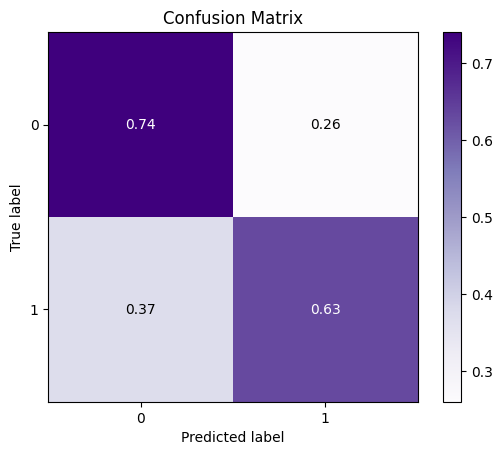

In [37]:
import scikitplot as skplt

skplt.metrics.plot_confusion_matrix(test_data['polarity'], test_data['pred_polarity_lex'],
                                    normalize=True,
                                    title="Confusion Matrix",
                                    cmap="Purples",
                                    );

In [38]:
print('\nClassification Report : ')
print(classification_report(test_data['polarity'], test_data['pred_polarity_lex']))


Classification Report : 
              precision    recall  f1-score   support

           0       0.68      0.74      0.71     10408
           1       0.69      0.63      0.66      9592

    accuracy                           0.69     20000
   macro avg       0.69      0.68      0.68     20000
weighted avg       0.69      0.69      0.68     20000



## Prédictions avec Radicalisation

In [46]:
test_data['word_pos_rad'] = test_data['stemmed_reviews'].apply(lambda l: [w for w in l if w in lex['positive_stemmed'].dropna().values])
test_data['word_neg_rad'] = test_data['stemmed_reviews'].apply(lambda l: [w for w in l if w in lex['negative_stemmed'].values])
test_data['diff_pos_neg_rad'] = test_data['word_pos_rad'].apply(len) - test_data['word_neg_rad'].apply(len)
test_data['pred_polarity_lex_rad'] = test_data['diff_pos_neg_rad'] > 0
test_data.head()

,review,polarity,clean_review,tokenized_review,stemmed_reviews,nosw_review,word_pos,word_neg,diff_pos_neg,pred_polarity_lex,word_pos_rad,word_neg_rad,diff_pos_neg_rad,pred_polarity_lex_rad
0,"Magnifique épopée, une belle histoire, touchante avec des acteurs qui interprètent très bien leur rôles (Mel Gibson, Heath Ledger, Jason Isaacs...), le genre de film qui se savoure en famille! :)",1,Magnifique épopée une belle histoire touchante avec des acteurs qui interprètent très bien leur rôles Mel Gibson Heath Ledger Jason Isaacs le genre de film qui se savoure en famille,"[Magnifique, épopée, une, belle, histoire, touchante, avec, des, acteurs, qui, interprètent, très, bien, leur, rôles, Mel, Gibson, Heath, Ledger, Jason, Isaacs, le, genre, de, film, qui, se, savoure, en, famille]","[magnif, épop, bel, histoir, touch, acteur, interprètent, tres, bien, rôl, mel, gibson, heath, ledg, jason, isaac, genr, film, savour, famill]","[magnifique, épopée, belle, histoire, touchante, acteurs, interprètent, très, bien, rôles, mel, gibson, heath, ledger, jason, isaacs, genre, film, savoure, famille]","[magnifique, belle, bien, genre]",[très],3,True,"[magnif, bel, bien, genr, savour]","[histoir, touch, tres]",2,True
1,"Je n'ai pas aimé mais pourtant je lui mets 2 étoiles car l'expérience est louable. Rien de conventionnel ici. Une visite E.T. mais jonchée d'idées /- originales. Le soucis, tout ceci avait-il vraiment sa place dans un film de S.F. tirant sur l'horreur ? Voici un film qui, à l'inverse de tant d'autres qui y ont droit, mériterait peut-être un remake.",0,Je n ai pas aimé mais pourtant je lui mets étoiles car l expérience est louable Rien de conventionnel ici Une visite E T mais jonchée d idées originales Le soucis tout ceci avait il vraiment sa place dans un film de S F tirant sur l horreur Voici un film qui à l inverse de tant d autres qui y ont droit mériterait peut être un remake,"[Je, n, ai, pas, aimé, mais, pourtant, je, lui, mets, étoiles, car, l, expérience, est, louable, Rien, de, conventionnel, ici, Une, visite, E, T, mais, jonchée, d, idées, originales, Le, soucis, tout, ceci, avait, il, vraiment, sa, place, dans, un, film, de, S, F, tirant, sur, l, horreur, Voici, un, film, qui, à, l, inverse, de, tant, d, autres, qui, y, ont, droit, mériterait, peut, être, un, remake]","[aim, pourt, met, étoil, car, expérient, louabl, rien, conventionnel, ici, visit, e, jonch, idé, original, souc, tout, cec, vrai, plac, film, f, tir, horreur, voic, film, invers, tant, autr, droit, mérit, peut, être, remak]","[aimé, pourtant, mets, étoiles, car, expérience, louable, rien, conventionnel, ici, visite, e, jonchée, idées, originales, soucis, tout, ceci, vraiment, place, film, f, tirant, horreur, voici, film, inverse, tant, autres, droit, mériterait, peut, être, remake]","[aimé, louable, droit]","[rien, soucis, tout, vraiment]",-1,False,"[aim, louabl, original, droit, mérit]","[rien, original, souc, tout, vrai, tir]",-1,False
2,Un dessin animé qui brille par sa féerie et ses chansons.,1,Un dessin animé qui brille par sa féerie et ses chansons,"[Un, dessin, animé, qui, brille, par, sa, féerie, et, ses, chansons]","[dessin, anim, brill, féer, chanson]","[dessin, animé, brille, féerie, chansons]",[animé],[],1,True,"[anim, brill]",[],2,True
3,"Si c'est là le renouveau du cinéma français, c'est tout de même foutrement chiant. Si l'objet est très stylisé et la tension palpable, le film paraît plutôt creux.",0,Si c est là le renouveau du cinéma français c est tout de même foutrement chiant Si l objet est très stylisé et la tension palpable le film paraît plutôt creux,"[Si, c, est, là, le, renouveau, du, cinéma, français, c, est, tout, de, même, foutrement, chiant, Si, l, objet, est, très, stylisé, et, la, tension, palpable, le, film, paraît, plutôt, creux]","[si, là, renouveau, cinem, franc, tout, foutr, chi, si, objet, tres, stylis, tension, palpabl, film, paraît, plutôt, creux]","[si, là, renouveau, cinéma, français, tout, foutrement, chiant, si, ob

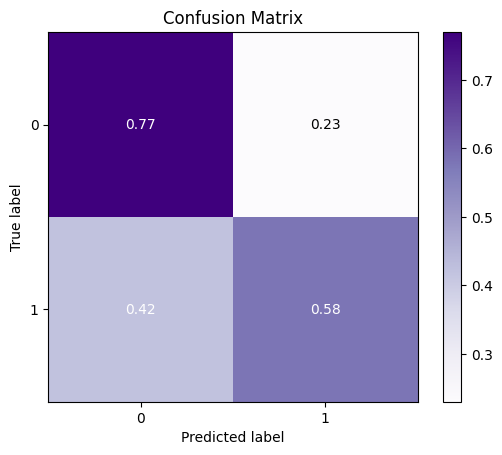

In [47]:
skplt.metrics.plot_confusion_matrix(test_data['polarity'], test_data['pred_polarity_lex_rad'],
                                    normalize=True,
                                    title="Confusion Matrix",
                                    cmap="Purples",
                                    );

In [48]:
print('\nClassification Report : ')
print(classification_report(test_data['polarity'], test_data['pred_polarity_lex_rad']))


Classification Report : 
              precision    recall  f1-score   support

           0       0.67      0.77      0.72     10408
           1       0.70      0.58      0.64      9592

    accuracy                           0.68     20000
   macro avg       0.69      0.68      0.68     20000
weighted avg       0.69      0.68      0.68     20000



In [53]:
# dataframe from dataframe if some columns have different values
test_data[test_data['pred_polarity_lex'] != test_data['pred_polarity_lex_rad']]

,review,polarity,clean_review,tokenized_review,stemmed_reviews,nosw_review,word_pos,word_neg,diff_pos_neg,pred_polarity_lex,word_pos_rad,word_neg_rad,diff_pos_neg_rad,pred_polarity_lex_rad
8,"Un très joli film, qui ressemble à un téléfilm mais qui a le mérite d'être émouvant et proche de ses personnages. Magimel est vraiment très bon et l'histoire est touchante",1,Un très joli film qui ressemble à un téléfilm mais qui a le mérite d être émouvant et proche de ses personnages Magimel est vraiment très bon et l histoire est touchante,"[Un, très, joli, film, qui, ressemble, à, un, téléfilm, mais, qui, a, le, mérite, d, être, émouvant, et, proche, de, ses, personnages, Magimel, est, vraiment, très, bon, et, l, histoire, est, touchante]","[tres, jol, film, ressembl, téléfilm, a, mérit, être, émouv, proch, personnag, magimel, vrai, tres, bon, histoir, touch]","[très, joli, film, ressemble, téléfilm, a, mérite, être, émouvant, proche, personnages, magimel, vraiment, très, bon, histoire, touchante]","[joli, mérite, personnages, bon]","[très, vraiment, très]",1,True,"[jol, mérit, personnag, bon]","[tres, vrai, tres, histoir, touch]",-1,False
12,"On ne comprend que guère l'espace et le temps dans ce grand récit un peu foutoir. Ce qui est dit est bien plus intéressant que ce qui nous est donné à voir. Les Soft focus, l'alternance couleur/Noir&Blanc est une déconvenue alambiquée sur l'histoire qui rétrograde ce film, qui fini grandement par lasser. La première heure contient les meilleures intentions.",0,On ne comprend que guère l espace et le temps dans ce grand récit un peu foutoir Ce qui est dit est bien plus intéressant que ce qui nous est donné à voir Les Soft focus l alternance couleur Noir Blanc est une déconvenue alambiquée sur l histoire qui rétrograde ce film qui fini grandement par lasser La première heure contient les meilleures intentions,"[On, ne, comprend, que, guère, l, espace, et, le, temps, dans, ce, grand, récit, un, peu, foutoir, Ce, qui, est, dit, est, bien, plus, intéressant, que, ce, qui, nous, est, donné, à, voir, Les, Soft, focus, l, alternance, couleur, Noir, Blanc, est, une, déconvenue, alambiquée, sur, l, histoire, qui, rétrograde, ce, film, qui, fini, grandement, par, lasser, La, première, heure, contient, les, meilleures, intentions]","[comprend, guer, espac, temp, grand, rec, peu, foutoir, dit, bien, plus, intéress, don, voir, soft, focus, altern, couleur, noir, blanc, déconvenu, alambiqu, histoir, rétrograd, film, fin, grand, lass, premi, heur, contient, meilleur, intent]","[comprend, guère, espace, temps, grand, récit, peu, foutoir, dit, bien, plus, intéressant, donné, voir, soft, focus, alternance, couleur, noir, blanc, déconvenue, alambiquée, histoire, rétrograde, film, fini, grandement, lasser, première, heure, contient, meilleures, intentions]","[grand, bien, plus, intéressant, soft]","[espace, temps, peu, noir, grandement, lasser]",-1,False,"[guer, grand, bien, plus, intéress, soft, fin, grand, premi, meilleur]","[espac, temp, grand, peu, noir, histoir, rétrograd, grand, lass]",1,True
20,"Le dernier Marvel exploite la franchise Spider-Man avec lourdeur : scénario inconsistant, effets spéciaux ringards, musique mièvre ou assourdissante, teen movie ridicule, jeunes acteurs cabotins... Seul Tom Holland tire son épingle du jeu dans ce pétard mouillé vendu comme le blockbuster de l'été.",0,Le dernier Marvel exploite la franchise Spider Man avec lourdeur scénario inconsistant effets spéciaux ringards musique mièvre ou assourdissante teen movie ridicule jeunes acteurs cabotins Seul Tom Holland tire son épingle du jeu dans ce pétard mouillé vendu comme le blockbuster de l été,"[Le, dernier, Marvel, exploite, la, franchise, Spider, Man, avec, lourdeur, scénario, inconsistant, effets, spéciaux, ringards, musique, mièvre, ou, assourdissante, teen, movie, ridicule, jeunes, acteurs, cabotins, Seul, Tom, Holland, tire, son, épingle, du, jeu, dans, ce, pétard, mouillé, vendu, comme, le, blockbuster, de, l, été]","[de

## Conclusions

Importance de la liste de mots...
Importance du threshold... 